In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
train_data = pd.read_csv('credit_card_default_train.csv')
test_data = pd.read_csv('credit_card_default_test.csv')

In [4]:
cat_cols = ['Gender','EDUCATION_STATUS','MARITAL_STATUS','AGE','PAY_JULY','PAY_AUG','PAY_SEP','PAY_OCT','PAY_NOV','PAY_DEC']
target = 'NEXT_MONTH_DEFAULT'
ID = 'Client_ID'
num_cols = [col for col in train_data.columns.tolist() if col not in cat_cols +[target]+[ID]]

In [5]:
num_cols

['Balance_Limit_V1',
 'DUE_AMT_JULY',
 'DUE_AMT_AUG',
 'DUE_AMT_SEP',
 'DUE_AMT_OCT',
 'DUE_AMT_NOV',
 'DUE_AMT_DEC',
 'PAID_AMT_JULY',
 'PAID_AMT_AUG',
 'PAID_AMT_SEP',
 'PAID_AMT_OCT',
 'PAID_AMT_NOV',
 'PAID_AMT_DEC']

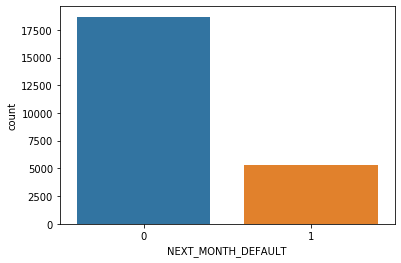

In [6]:
sns.countplot(x=target, data=train_data)

In [12]:
cat_cols

['Gender',
 'EDUCATION_STATUS',
 'MARITAL_STATUS',
 'AGE',
 'PAY_JULY',
 'PAY_AUG',
 'PAY_SEP',
 'PAY_OCT',
 'PAY_NOV',
 'PAY_DEC']

In [16]:
gender = pd.get_dummies(train_data[cat_cols[0]],drop_first=True)
education_status = pd.get_dummies(train_data[cat_cols[1]],drop_first=True)
marital_status = pd.get_dummies(train_data[cat_cols[2]],drop_first=True)
age = pd.get_dummies(train_data[cat_cols[3]],drop_first=True)
pay_july = pd.get_dummies(train_data[cat_cols[4]],drop_first=True)
pay_aug = pd.get_dummies(train_data[cat_cols[5]],drop_first=True)
pay_sep = pd.get_dummies(train_data[cat_cols[6]],drop_first=True)
pay_oct = pd.get_dummies(train_data[cat_cols[7]],drop_first=True)
pay_nov = pd.get_dummies(train_data[cat_cols[8]],drop_first=True)
pay_dec = pd.get_dummies(train_data[cat_cols[9]],drop_first=True)
train_data.drop(cat_cols,axis=1,inplace = True)
train_data_updated = pd.concat([train_data,gender,education_status,marital_status,age,pay_july,pay_aug,pay_sep,pay_oct,pay_nov,pay_dec],axis=1)
train_data_updated

,Client_ID,Balance_Limit_V1,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,...,8,-1,0,2,3,4,5,6,7,8
0,A2,1M,3248,3389,6004,39418,162772,-13982,3437,6004,...,0,1,0,0,0,0,0,0,0,0
1,A3,1M,353351,151818,26948,43530,80811,124590,151818,46200,...,0,0,1,0,0,0,0,0,0,0
2,A4,100K,16681,16082,15477,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A5,200K,90457,92848,95193,97309,100353,102740,3855,3890,...,0,0,1,0,0,0,0,0,0,0
4,A6,1M,429556,419466,429785,435354,445271,453899,0,20790,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,A29996,1M,436470,445403,481323,203289,72157,36914,19635,46200,...,0,0,1,0,0,0,0,0,0,0
23996,A29997,400K,3888,4223,8090,20741,11989,0,4243,8145,...,0,0,1,0,0,0,0,0,0,0
23997,A29998,100K,8235,7752,6371,48228,47544,44715,0,0,...,0,0,1,0,0,0,0,0,0,0
23998,A29999,200K,-3800,181055,176262,121908,27385,113061,198429,7875,...,0,1,0,0,0,0,0,0,0,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop([target,ID,'Balance_Limit_V1'],axis=1), 
                                                    train_data[target], test_size=0.30)

In [40]:
param_grid = {'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [100,150,200]}
model = RandomForestClassifier()

model_random = GridSearchCV(estimator = model, param_grid = param_grid,scoring = 'f1' ,cv = 5, verbose=2,return_train_score=True)
model_random.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] bootstrap=True, max_features=auto, n_estimators=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_features=auto, n_estimators=100, total=   3.7s
[CV] bootstrap=True, max_features=auto, n_estimators=100 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV]  bootstrap=True, max_features=auto, n_estimators=100, total=   3.6s
[CV] bootstrap=True, max_features=auto, n_estimators=100 .............
[CV]  bootstrap=True, max_features=auto, n_estimators=100, total=   3.8s
[CV] bootstrap=True, max_features=auto, n_estimators=100 .............
[CV]  bootstrap=True, max_features=auto, n_estimators=100, total=   3.7s
[CV] bootstrap=True, max_features=auto, n_estimators=100 .............
[CV]  bootstrap=True, max_features=auto, n_estimators=100, total=   3.8s
[CV] bootstrap=True, max_features=auto, n_estimators=150 .............
[CV]  bootstrap=True, max_features=auto, n_estimators=150, total=   5.6s
[CV] bootstrap=True, max_features=auto, n_estimators=150 .............
[CV]  bootstrap=True, max_features=auto, n_estimators=150, total=   5.5s
[CV] bootstrap=True, max_features=auto, n_estimators=150 .............
[CV]  bootstrap=True, max_features=auto, n_estimators=150, total=   5.8s
[CV] bootstrap=True, max_features=auto, n_estimators=150 ......

[CV]  bootstrap=False, max_features=sqrt, n_estimators=200, total=  11.7s
[CV] bootstrap=False, max_features=sqrt, n_estimators=200 ............
[CV]  bootstrap=False, max_features=sqrt, n_estimators=200, total=  11.6s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  7.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [41]:
preds = model_random.predict(X_test)

In [42]:
print(classification_report(y_test,preds))
print ('\n')
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      5650
           1       0.49      0.23      0.31      1550

    accuracy                           0.78      7200
   macro avg       0.65      0.58      0.59      7200
weighted avg       0.75      0.78      0.75      7200



[[5284  366]
 [1194  356]]
